In [21]:
import pandas as pd
import numpy as np

#Methods available include: 
#    .min() - Compute minimum value
#    .max() - Compute maximum value
#    .mean() - Compute mean value
#    .median() - Compute median value
#    .mode() - Compute mode value(s)
#    .count() - Count the number of observations
#    .std() - Compute Standard Deviation
#    .var() - Compute variance

In [10]:
#Categorical predictors
# read data into a DataFrame
#data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
#data.head()

# print the shape of the DataFrame
#data.shape

# visualize the relationship between the features and the response using scatterplots
#fig, axs = plt.subplots(1, 3, sharey=True)
#data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
#data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
#data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

# this is the standard import if you're using "formula notation" (similar to R)
#import statsmodels.formula.api as smf

# create a fitted model in one line
#formula notification is the equivalent to writing out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
#lm = smf.ols(formula='Sales ~ TV', data=data).fit()

#print the full summary
#lm.summary()


# print the coefficients
#lm.params

# manually calculate the prediction
#7.032594 + 0.047537*50000

# you have to create a DataFrame since the Statsmodels formula interface expects it
#X_new = pd.DataFrame({'TV': [50000]})
#X_new.head()

# use the model to make predictions on a new value
#lm.predict(X_new)

# print the confidence intervals for the model coefficients
#lm.conf_int()

# print the p-values for the model coefficients
#lm.pvalues

In [11]:
#np.random.seed(12345) # set a seed for reproducibility
#nums = np.random.rand(len(data)) # create a Series of booleans
#mask_large = nums > 0.5 # roughly half of booleans are True
#data['Size'] = 'small' #set Size to small
#data.loc[mask_large, 'Size'] = 'large' #change roughly half to be large
#data['IsLarge'] = data.Size.map({'small':0, 'large':1}) # create a new Series called IsLarge
#np.random.seed(123456) # set a seed for reproducibility

# assign roughly one third of observations to each group
#nums = np.random.rand(len(data))
#mask_a = (nums > 0.33) & (nums < 0.66)
#mask_b = nums > 0.66
#data['Series'] = 'Seed' #sets original categorical value to Area_rural
#data.loc[mask_a, 'Series'] = 'A' #sets dummy to Series_a
#data.loc[mask_b, 'Series'] = 'B' #sets dummy to Series_b

# create three dummy variables using get_dummies, then exclude the first dummy column
#area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
#data = pd.concat([data, area_dummies], axis=1)
#data.head() #shows data

# read data into a DataFrame
#data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
#data.head()
# set a seed for reproducibility
#np.random.seed(12345)

# create a Series of booleans in which roughly half are True
#nums = np.random.rand(len(data))
#mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
#data['Size'] = 'small'
#data.loc[mask_large, 'Size'] = 'large'
#data.head()
# create a new Series called IsLarge
#data['IsLarge'] = data.Size.map({'small':0, 'large':1})
#data.head()
# set a seed for reproducibility
#np.random.seed(123456)

# assign roughly one third of observations to each group
#nums = np.random.rand(len(data))
#mask_suburban = (nums > 0.33) & (nums < 0.66)
#mask_urban = nums > 0.66
#data['Area'] = 'rural'
#data.loc[mask_suburban, 'Area'] = 'suburban'
#data.loc[mask_urban, 'Area'] = 'urban'
#data.head()
# create three dummy variables using get_dummies, then exclude the first dummy column
#area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
#data = pd.concat([data, area_dummies], axis=1)
#data.head()


In [20]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

%matplotlib inline
# Generate some data and randomize

# Some people bought nothing, the others bought with some distribution
data1 = [0] * 50
data1.extend(stats.norm(12, 4).rvs(150))
np.random.shuffle(data1)

# The second design hooked less people, but those that were hooked bought more stuff
data2 = [0] * 100
data2.extend(stats.norm(20, 5).rvs(100))
np.random.shuffle(data2)

# Make a data frame
df = pd.DataFrame()
df["A"] = data1
df["B"] = data2

df.head()

,A,B
0,12.303404,22.508003
1,8.573440,15.999147
2,0.000000,0.000000
3,10.342754,15.619630
4,7.744420,14.537671


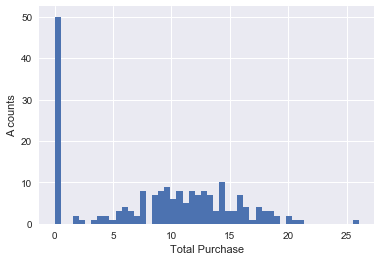

In [16]:
# Let's plot the data first
plt.hist(df["A"], bins=50, label="A")
plt.ylabel("A counts")
plt.xlabel("Total Purchase")

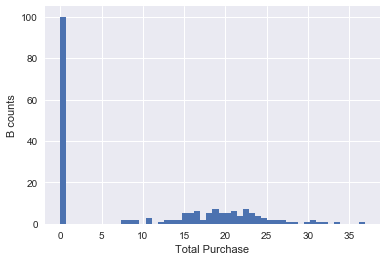

In [17]:
# Exercise: Make the same plot for dataset "B"
plt.hist(df["B"], bins=50, label="B")
plt.ylabel("B counts")
plt.xlabel("Total Purchase")

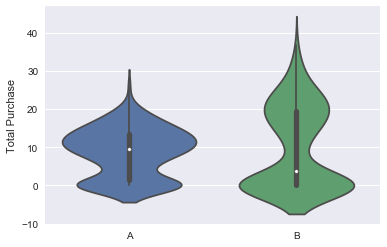

In [18]:
# Seaborn is also useful

sns.violinplot(data=df)
plt.ylabel("Total Purchase")
sns.plt.show()

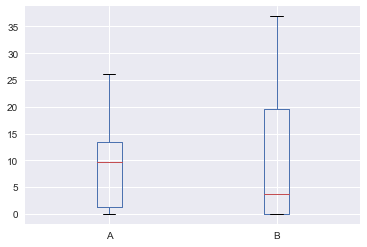

In [19]:
# Work out the exercises here
df.plot.box()

In [22]:
# For example, to use ANOVA
statistic, pvalue = stats.f_oneway(df["A"], df["B"])
print (pvalue)

0.235081126079
